<a href="https://colab.research.google.com/github/LeoMagallanes/Incident-Classifier/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
MagaLink = '/content/drive/MyDrive/IA/7mo sem/IntelligentsAgents/Proyecto/Incidents-subset'

CarlosLink ='/content/drive/MyDrive/Proyecto/Incidents-subset'

currentRoot = MagaLink

In [ ]:
import os
import shutil
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, f1_score
import ast
from sklearn.decomposition import PCA
import random

from mpl_toolkits.mplot3d import Axes3D

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder

from tensorflow import keras
from tensorflow.keras import layers

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

# For the feature learning and building our custom dataset.
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import Dataset, DataLoader
from skimage import io
from skimage.feature import hog
from skimage.transform import resize

# Categories

In [ ]:
# Obtener la lista de nombres de las carpetas en el directorio principal
carpetas = [nombre for nombre in os.listdir(currentRoot) if os.path.isdir(os.path.join(currentRoot, nombre))]
name_categories = [nombre for nombre in os.listdir(currentRoot) if os.path.isdir(os.path.join(currentRoot, nombre))]

# Imprimir los nombres de las carpetas
for carpeta in carpetas:
    print(carpeta)

nuclear_explosion
ice_storm
flooded
bicycle_accident
collapsed
oil_spill
airplane_accident
tornado
car_accident
earthquake
volcanic_eruption
wildfire


In [ ]:
images = {}
folder_images_list=[]
# Iterate over each subfolder
count=0
for folder in os.listdir(currentRoot):
    folder_path = os.path.join(currentRoot, folder)
    if os.path.isdir(folder_path):
        # Get the names of the files in the subfolder
        files = os.listdir(folder_path)
        image_list=[]
        # Rename the files sequentially
        for i, file_name in enumerate(files, start=1):
            file_path = os.path.join(folder_path, file_name)
            new_file_name = f"{i}_{folder}{os.path.splitext(file_name)[1]}"
            new_file_path = os.path.join(folder_path, new_file_name)
            image_list.append(new_file_name)
            folder_images_list.append([folder,file_name,file_path])
            # Rename the file
            #try:
            #    os.rename(file_path, new_file_path)
            #except Exception:
            #    None
            #try:
            #    cv2.imread(new_file_path)
            #except cv2.error as e:
            #    count+=1
        images[folder]=image_list
print(count)

0


# Classes Distribution

nuclear_explosion: 231 occurrences
ice_storm: 615 occurrences
flooded: 957 occurrences
bicycle_accident: 228 occurrences
collapsed: 688 occurrences
oil_spill: 293 occurrences
airplane_accident: 872 occurrences
tornado: 281 occurrences
car_accident: 966 occurrences
earthquake: 924 occurrences
volcanic_eruption: 627 occurrences
wildfire: 676 occurrences


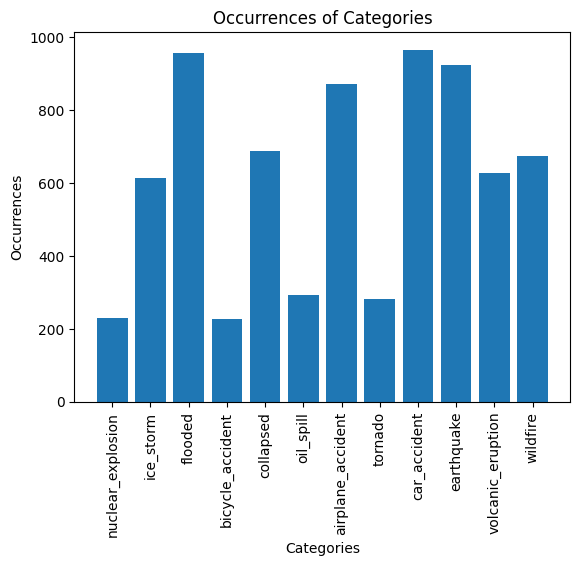

In [ ]:
occurrences = [len(images[category]) for category in carpetas]

# Print the occurrences for each category
for i, category in enumerate(carpetas):
    print(f"{category}: {occurrences[i]} occurrences")


plt.bar(carpetas, occurrences)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Occurrences')
plt.title('Occurrences of Categories')

# Rotate x-labels by 90 degrees
plt.xticks(rotation=90)

# Display the plot
plt.show()

# Image Dimensions

In [ ]:
#Ocupo un array que tenga de elementos tuplas. para guardar width and height.
count = 0
dimensions = []
flattenDimensions = []
for folder in os.listdir(currentRoot):
    folder_path = os.path.join(currentRoot, folder)
    if os.path.isdir(folder_path):
        files = os.listdir(folder_path)
        category_dimensions=[]

        for i, file_name in enumerate(files, start=1):
          # Get the images of the files in the subfolder
          try:
            file_path = os.path.join(folder_path, file_name)
            img = cv2.imread(file_path)
            print(file_path)
            tupla = [img.shape[1], img.shape[0]]
            flattenDimensions.append(tupla)
            category_dimensions.append(tupla)
          except Exception:
            count += 1
            continue
        dimensions.append(category_dimensions)

meanWidth = 0
meanHeight = 0
count = 0
std_deviation = 0
for category in dimensions:
  print(category)



Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/IA/7mo sem/IntelligentsAgents/Proyecto/Incidents-subset/collapsed/3_collapsed.jpeg
/content/drive/MyDrive/IA/7mo sem/IntelligentsAgents/Proyecto/Incidents-subset/collapsed/669_collapsed.jpg
/content/drive/MyDrive/IA/7mo sem/IntelligentsAgents/Proyecto/Incidents-subset/collapsed/220_collapsed.jpg
/content/drive/MyDrive/IA/7mo sem/IntelligentsAgents/Proyecto/Incidents-subset/collapsed/472_collapsed.jpg
/content/drive/MyDrive/IA/7mo sem/IntelligentsAgents/Proyecto/Incidents-subset/collapsed/445_collapsed.jpg
/content/drive/MyDrive/IA/7mo sem/IntelligentsAgents/Proyecto/Incidents-subset/collapsed/117_collapsed.jpg
/content/drive/MyDrive/IA/7mo sem/IntelligentsAgents/Proyecto/Incidents-subset/collapsed/409_collapsed.jpg
/content/drive/MyDrive/IA/7mo sem/IntelligentsAgents/Proyecto/Incidents-subset/collapsed/303_collapsed.jpg
/content/drive/MyDrive/IA/7mo sem/IntelligentsAgents/Proyecto/Incidents-subset/collapsed/221_c

In [ ]:

flattenDimensions = np.array(flattenDimensions)
# Calcular la media de width y height
meanWidth = np.mean(flattenDimensions[:, 0])
meanHeight = np.mean(flattenDimensions[:, 1])

print("Media de width:", meanWidth)
print("Media de height:", meanHeight)

# Calcular la media de width y height
stdW = np.std(flattenDimensions[:, 0])
stdH = np.std(flattenDimensions[:, 1])

print("Std de width:", stdW)
print("Std de height:", stdH)

Media de width: 999.0010872519706
Media de height: 694.1414786626801
Std de width: 796.8698054361753
Std de height: 565.4084990727414


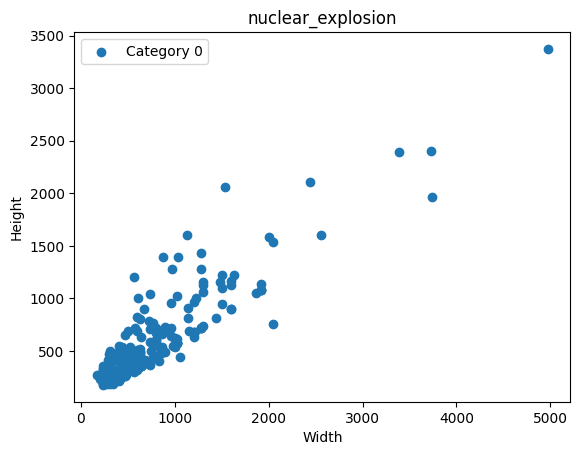

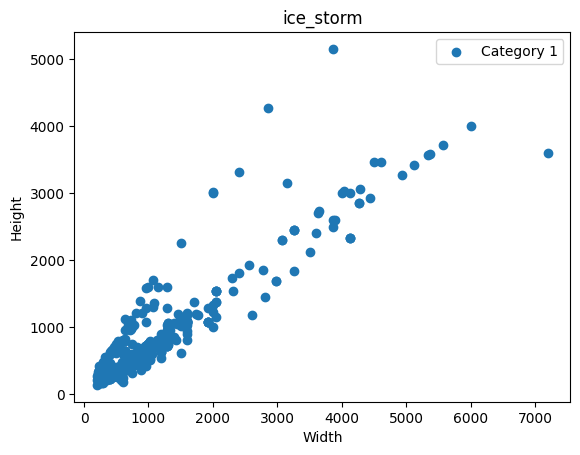

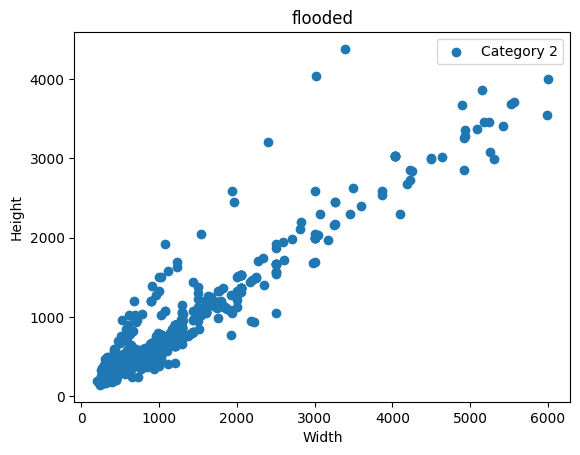

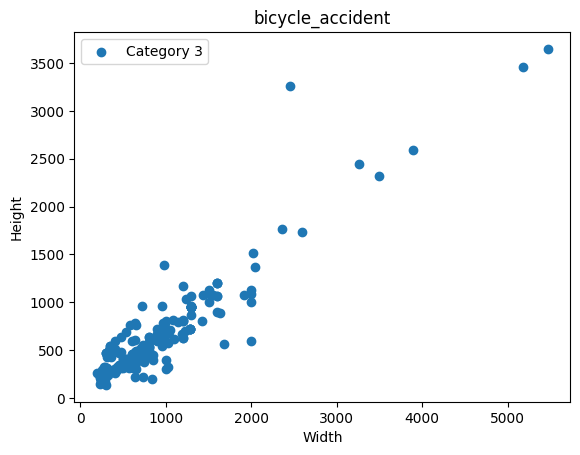

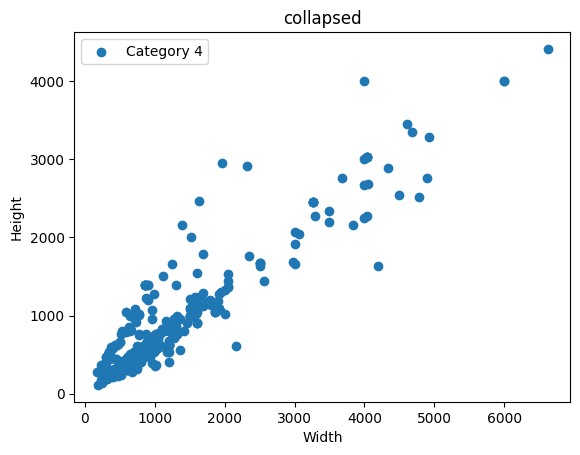

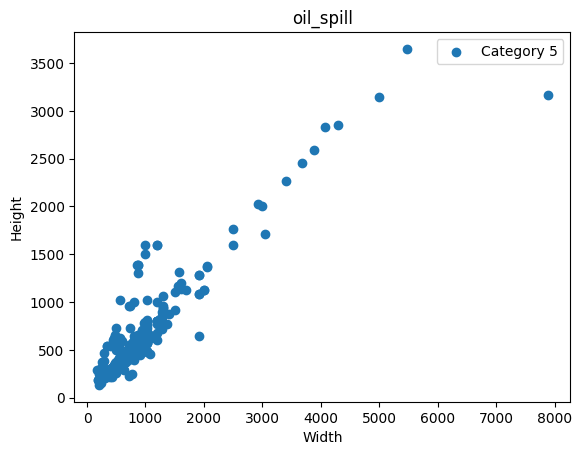

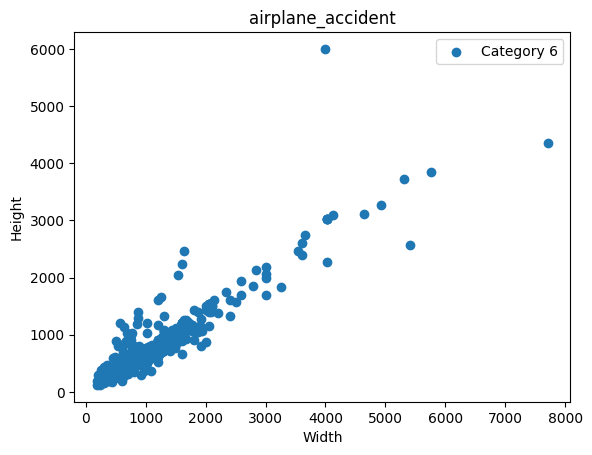

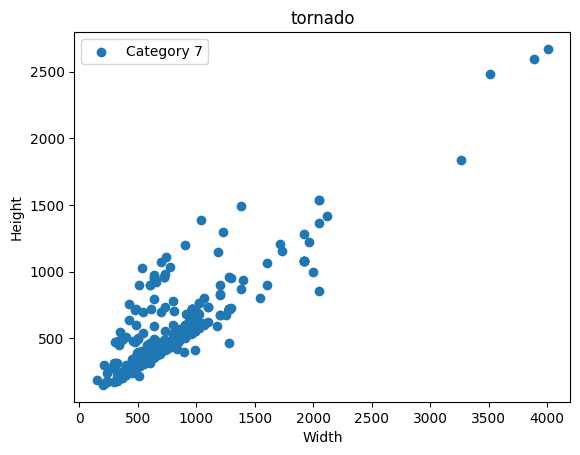

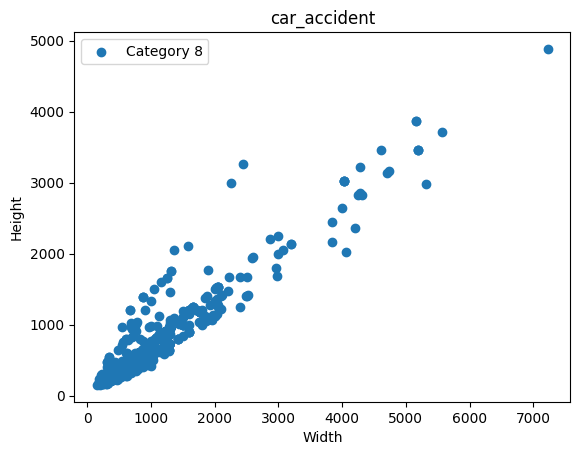

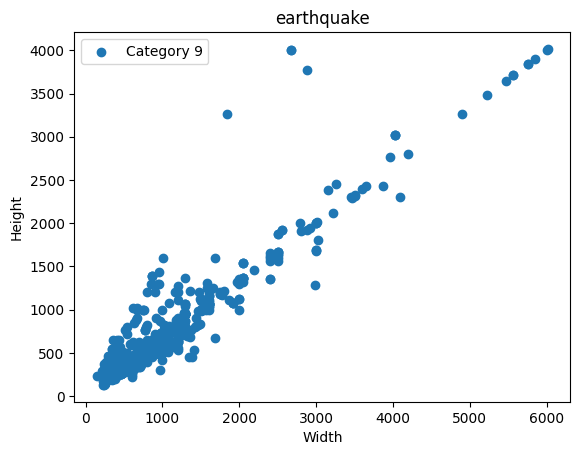

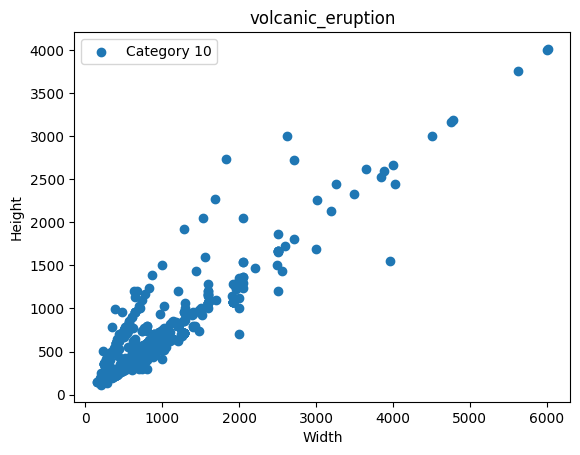

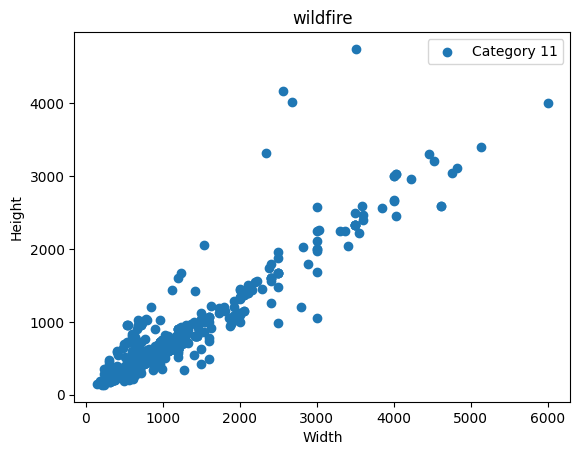

In [ ]:
#dimensions -> category_dimension -> tupla

# Plotting the dimensions
for i, category_dimensions in enumerate(dimensions):
  widths = [dim[0] for dim in category_dimensions]
  heights = [dim[1] for dim in category_dimensions]
  plt.scatter(widths, heights, label=f'Category {i}')

  # Add labels and title
  plt.xlabel('Width')
  plt.ylabel('Height')
  plt.title(carpetas[i])

  # Add legend
  plt.legend()

  # Display the plot
  plt.show()

# Histograms

In [ ]:
# Read the CSV file
df = pd.read_pickle(currentRoot+'\histograms.pkl')
histograms_list=df.values

Mean and Std Histogram values

In [ ]:
# Group the DataFrame by "Categorie" and "Histogram"
grouped_df = df.groupby(['Categorie','Channel', 'Histogram'])

# Calculate the standard deviation and mean for each bin within each category
std_dev = df.groupby(['Categorie','Channel'])['Histogram'].apply(lambda x: np.std(list(x), axis=0))
mean = df.groupby(['Categorie','Channel'])['Histogram'].apply(lambda x: np.mean(list(x), axis=0))

mean['airplane_accident',0]

array([15144.282 ,  4429.5186,  3261.406 ,  3146.085 ,  3308.7065,
        3395.4036,  3532.7385,  3820.4026,  4101.5757,  4417.3555,
        4644.618 ,  4846.0425,  4876.163 ,  4997.407 ,  5065.3945,
        5127.82  ,  5216.318 ,  5280.47  ,  5397.0435,  5455.154 ,
        5581.1973,  5672.948 ,  5695.499 ,  5728.4565,  5689.812 ,
        5610.954 ,  5568.2227,  5551.087 ,  5502.727 ,  5473.017 ,
        5472.4814,  5467.971 ,  5436.563 ,  5451.177 ,  5459.8145,
        5465.0586,  5455.508 ,  5476.2935,  5443.7866,  5421.1045,
        5408.818 ,  5419.117 ,  5415.2305,  5403.64  ,  5406.038 ,
        5384.698 ,  5414.0605,  5430.7856,  5450.2627,  5504.8315,
        5669.4585,  5501.217 ,  5497.1353,  5506.3853,  5390.295 ,
        5371.0986,  5372.1436,  5355.101 ,  5309.335 ,  5260.203 ,
        5232.4634,  5201.2764,  5156.4336,  5138.0977,  5107.471 ,
        5086.6523,  5047.829 ,  5022.102 ,  5025.023 ,  4985.1895,
        4993.36  ,  4959.779 ,  5038.234 ,  4932.812 ,  4897.1

Plot of the mean and variance for each channel

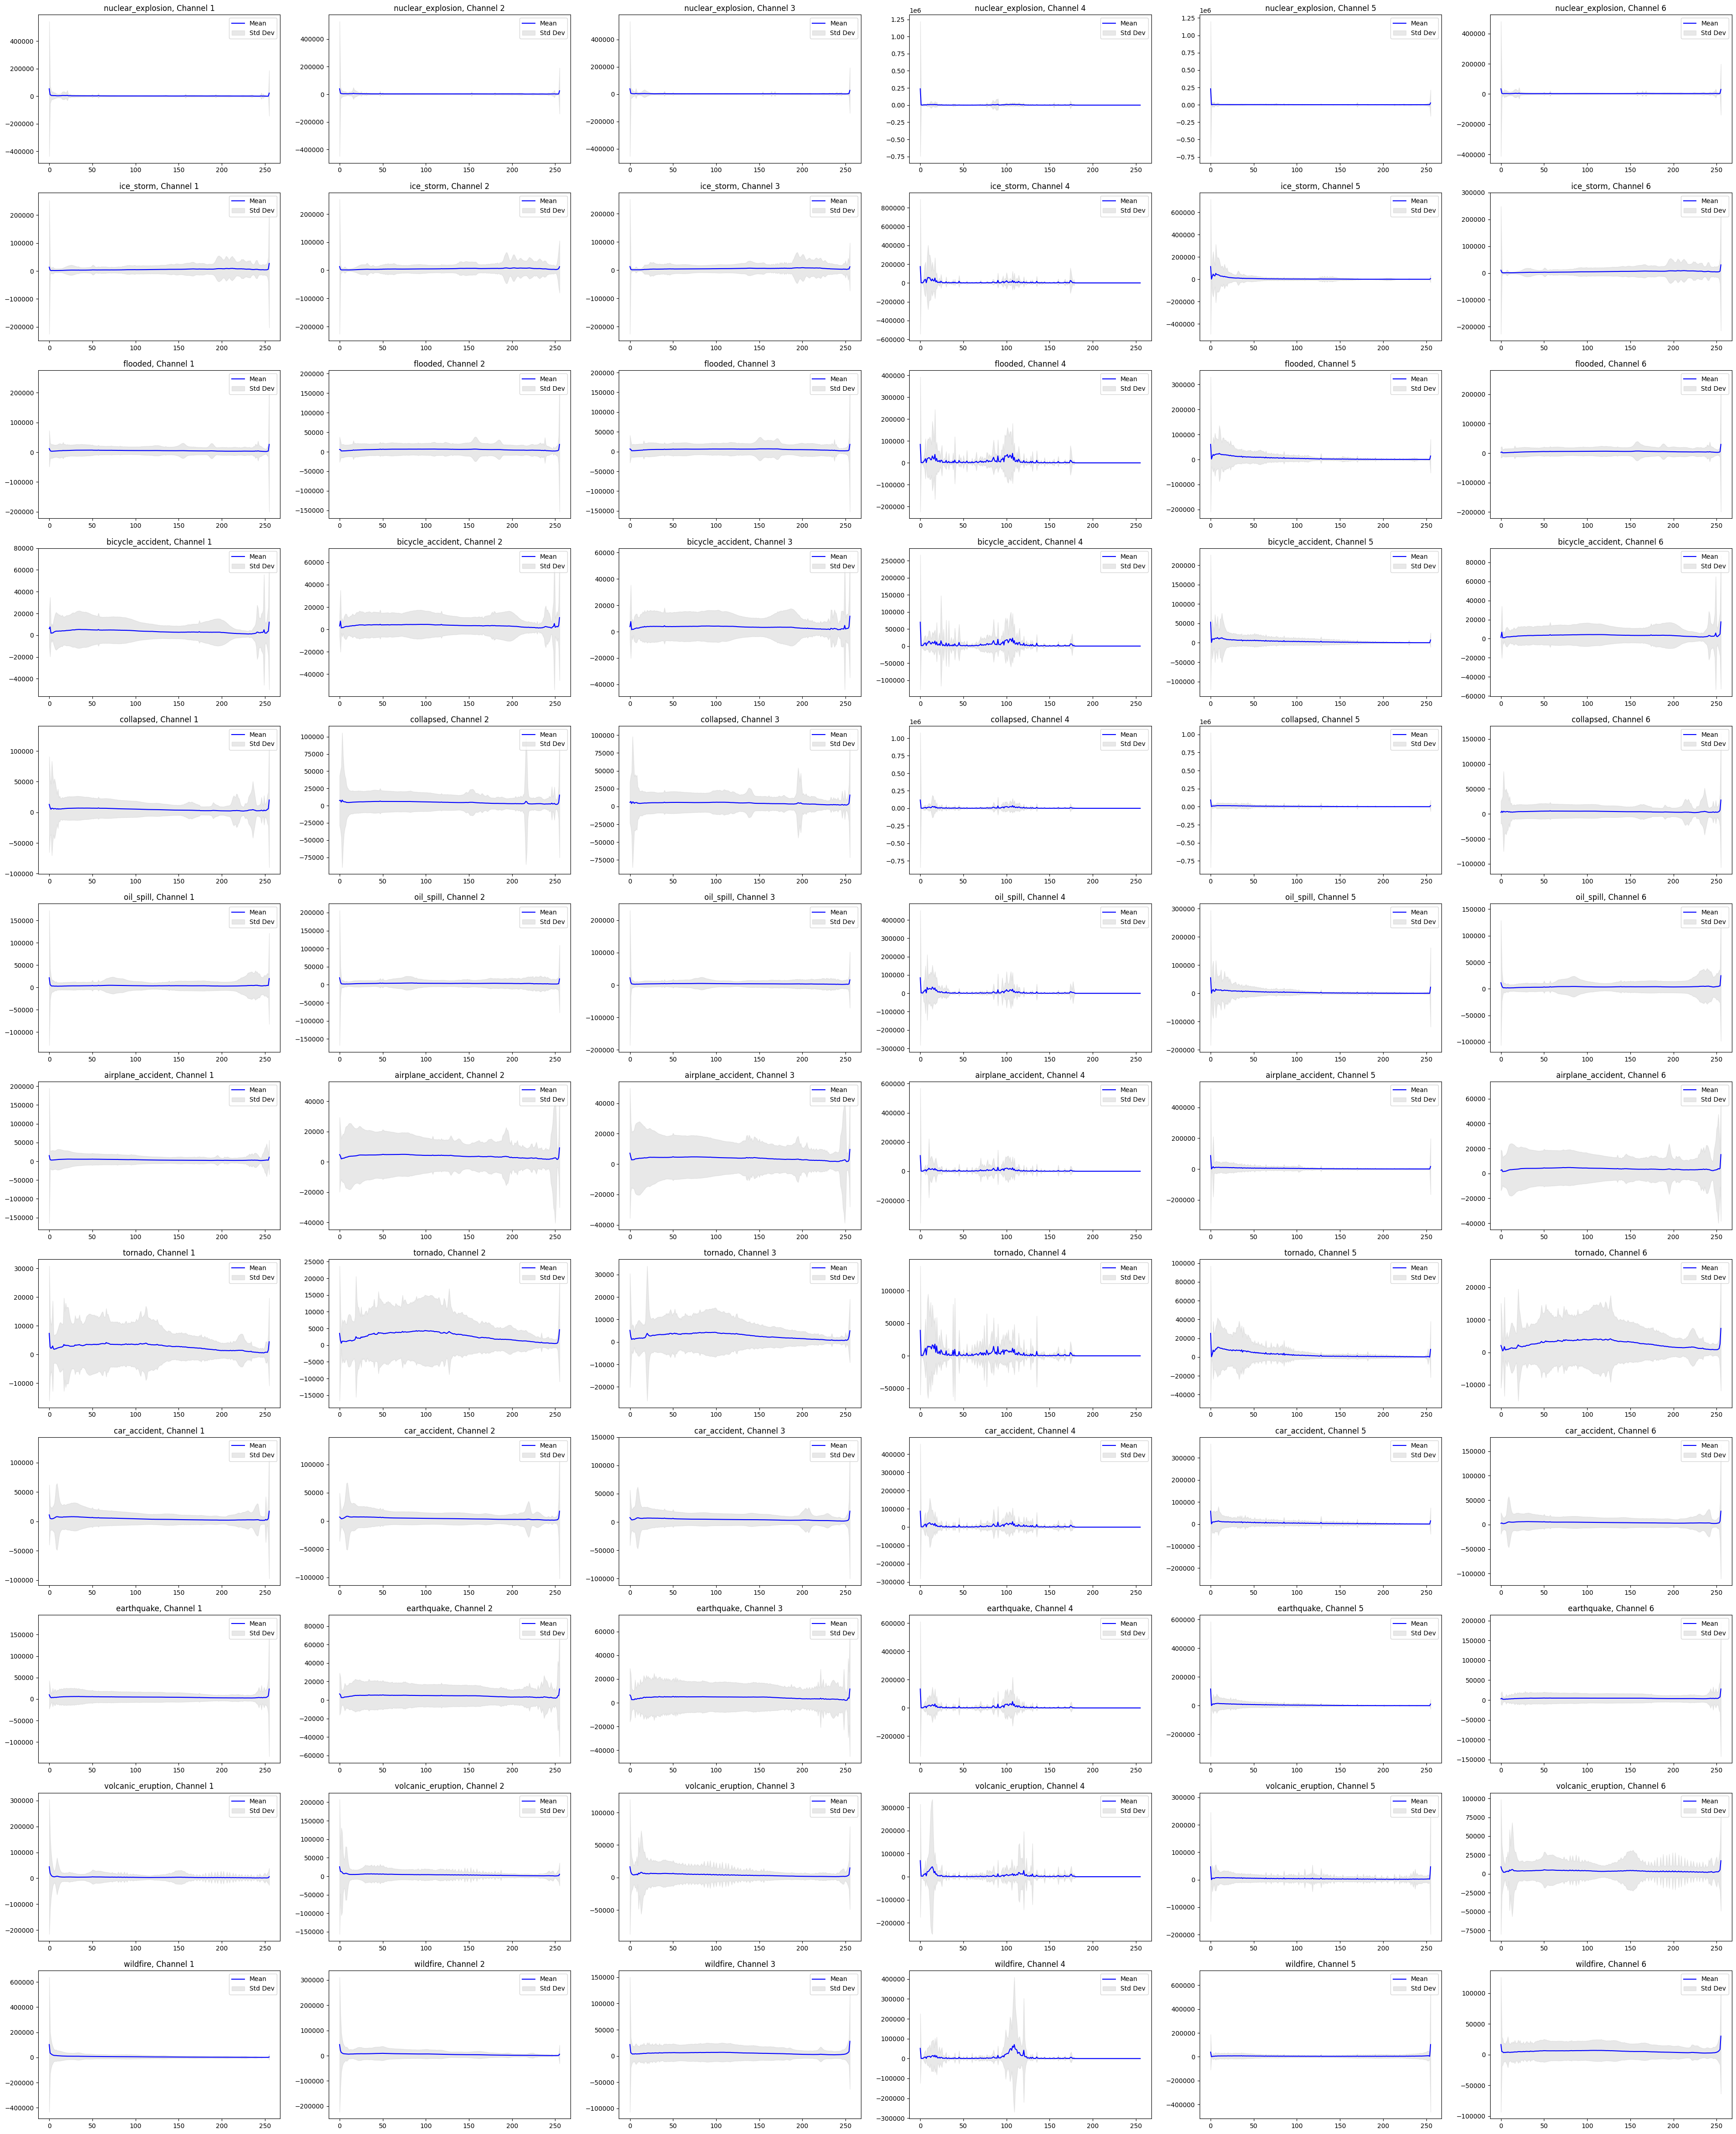

In [ ]:
ncategories=12
nchannels=6
nbins=256
ncategories = 12
nchannels = 6
nbins = 256
countnnn=0
category_name=carpetas
# Plot the mean histograms and standard deviation
fig, axes = plt.subplots(ncategories, nchannels, figsize=(48, 60))

for i,category_name in enumerate(name_categories):
  for j in range(nchannels):
    ax = axes[i, j]
    h_mean=mean[category_name, j]
    h_std=std_dev[category_name, j]
    ax.plot(mean[category_name, j], color='blue', label='Mean')
    ax.fill_between(range(nbins), h_mean - h_std, h_mean + h_std, color='lightgray', alpha=0.5, label='Std Dev')
    ax.set_title(f"{category_name}, Channel {j+1}")
    ax.legend()

plt.show()


Plot all the channels of the hist per category

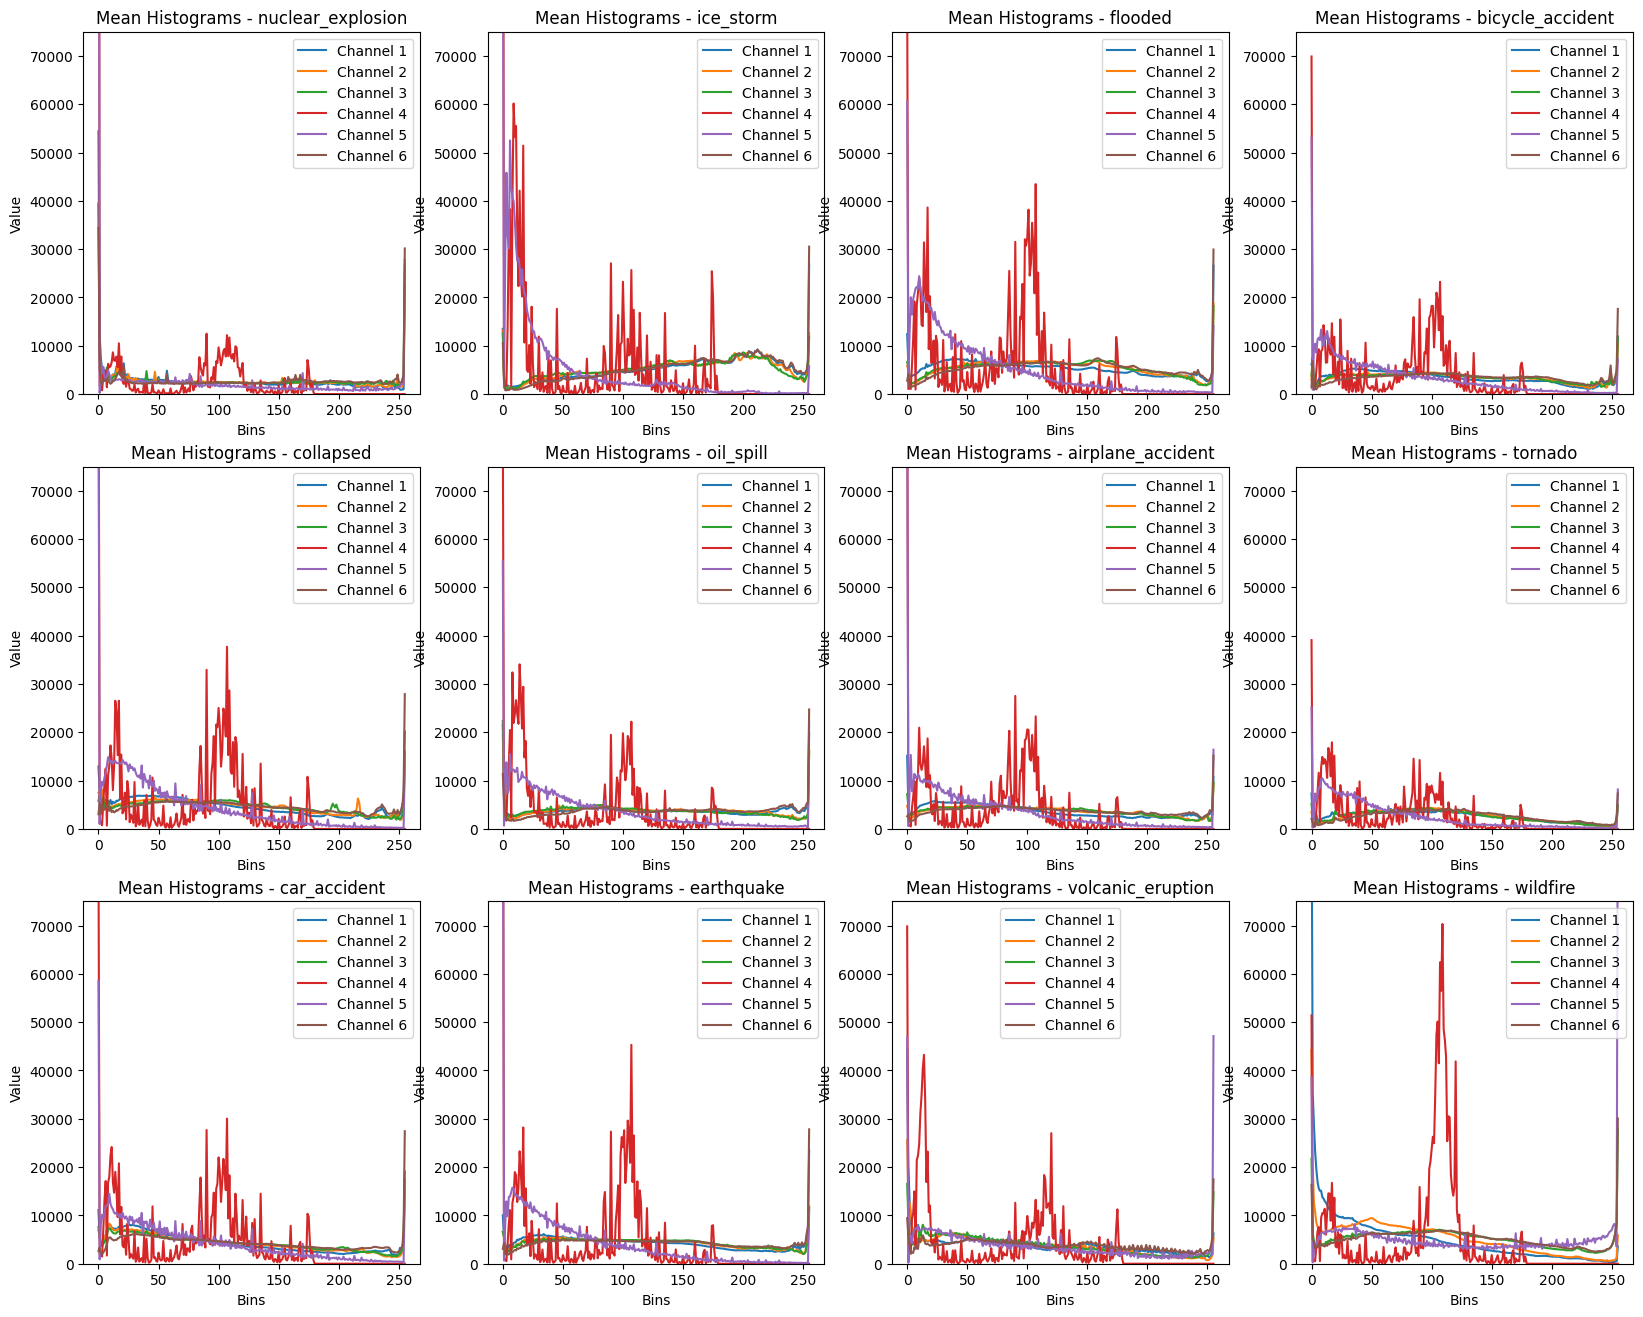

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of rows and columns in the grid
num_rows = int(np.ceil(len(name_categories) / 4))
num_columns = 4

# Create the grid of plots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 16))

# Iterate over each category and plot the mean histograms
for i, category_name in enumerate(name_categories):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]

    for j in range(nchannels):
        h_mean = mean[category_name, j]
        color = plt.cm.tab10(j)  # Use a different color for each channel

        ax.plot(h_mean, color=color, label=f"Channel {j+1}")

    ax.set_xlabel('Bins')
    ax.set_ylabel('Value')
    ax.set_title(f"Mean Histograms - {category_name}")
    ax.legend()

    # Set the same y-axis limits for all subplots
    ax.set_ylim([0, 75000])

# Hide any unused subplots
if len(name_categories) < (num_rows * num_columns):
    for i in range(len(name_categories), (num_rows * num_columns)):
        row = i // num_columns


PCA of Histograms

In [ ]:
histograms_array = np.array(histograms_list)

histograms_per_channels=[]
for i in range(nchannels):
  histograms_per_channels.append(histograms_array[histograms_array[:,2]==i])

3D PCA

<ipython-input-27-5d7e974ecb31>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('tab20')


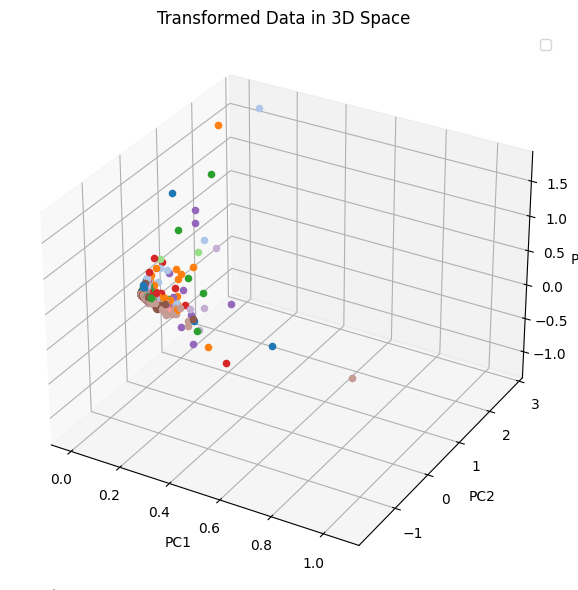

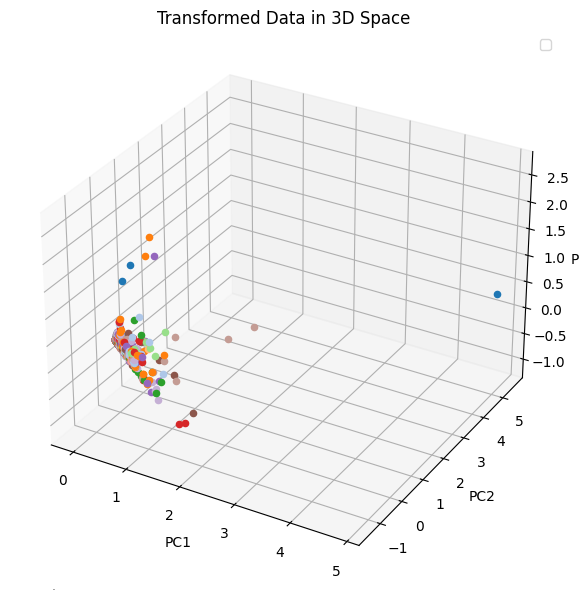

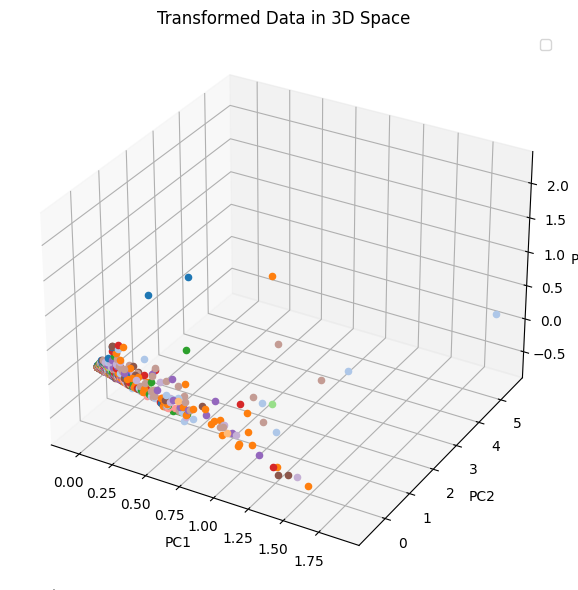

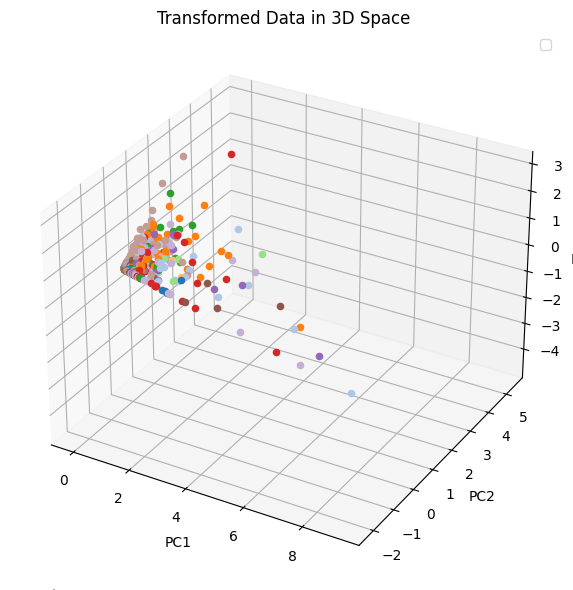

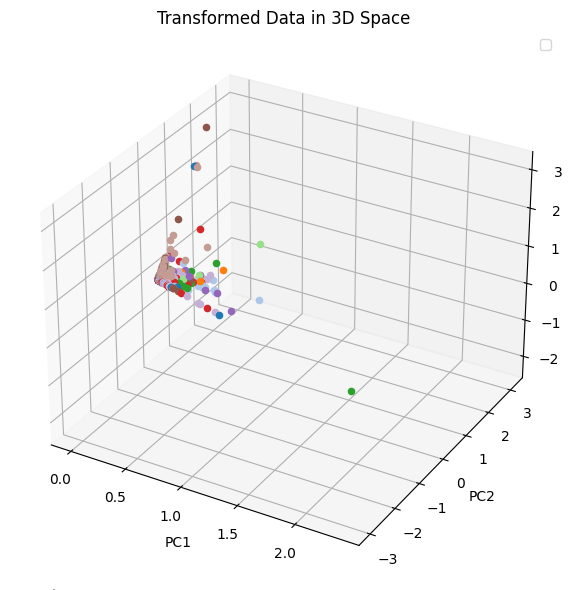

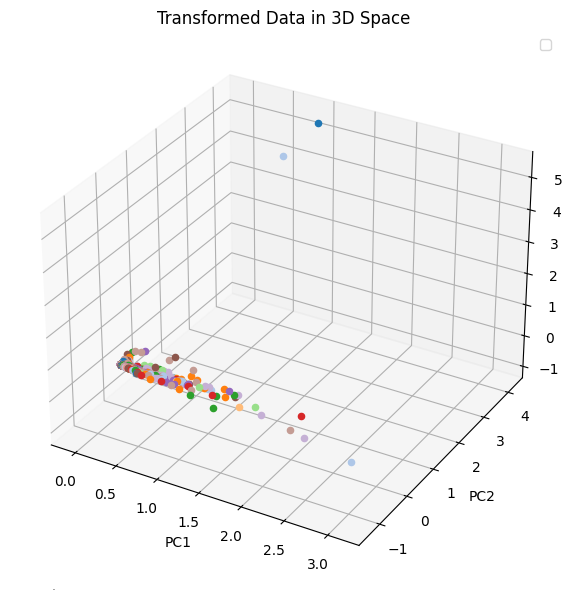

In [ ]:
pca_results = []
histograms_per_channels
# Perform PCA for each channel's histograms
for i in range(nchannels):
    # Apply PCA
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(histograms_per_channels[i][:,3].tolist())
    pca_results.append(pca_result)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Create a color map with a unique color for each category
color_map = cm.get_cmap('tab20')

# Create a dictionary to store the category-color mapping
category_colors = {}

# Assign a color to each category
for i, category_name in enumerate(name_categories):
    color = color_map(i % 12)  # Adjust the modulo value based on the number of categories
    category_colors[category_name] = color


for chanel_number, channel_result in enumerate(pca_results):
    # Plot the transformed data for each channel in a 3D space with different colors per category
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    for i, pca_components_for_channel in enumerate(channel_result):
        if random.random() > 0.4:
          continue
        x = pca_components_for_channel[0]
        y = pca_components_for_channel[1]
        z = pca_components_for_channel[2]
        category_name_i= histograms_per_channels[chanel_number][i][0]
        # Get the color for the category based on the colormap
        color = category_colors[category_name_i]

        ax.scatter(x, y, z, color=color)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('Transformed Data in 3D Space')
    ax.legend()

    plt.tight_layout()
    plt.show()

2D PCA

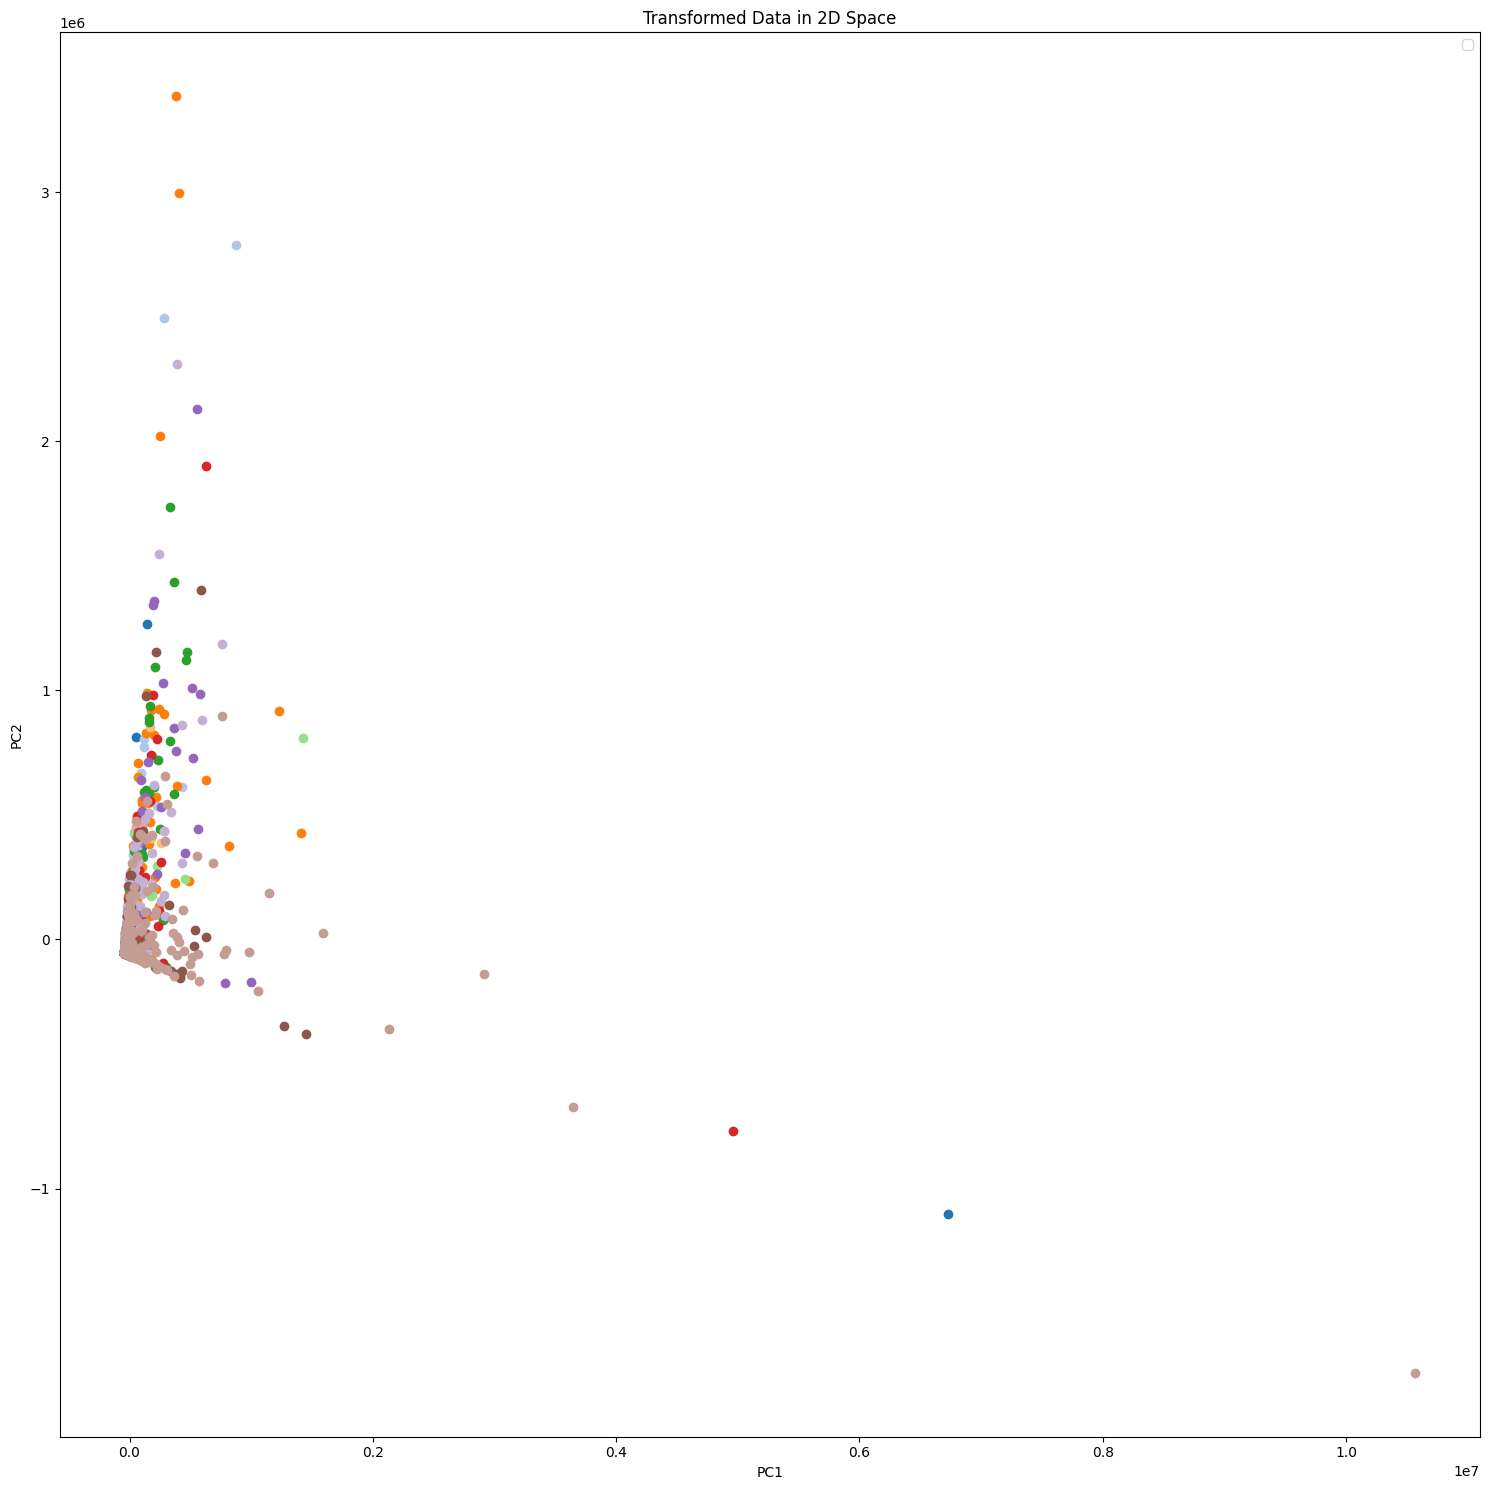

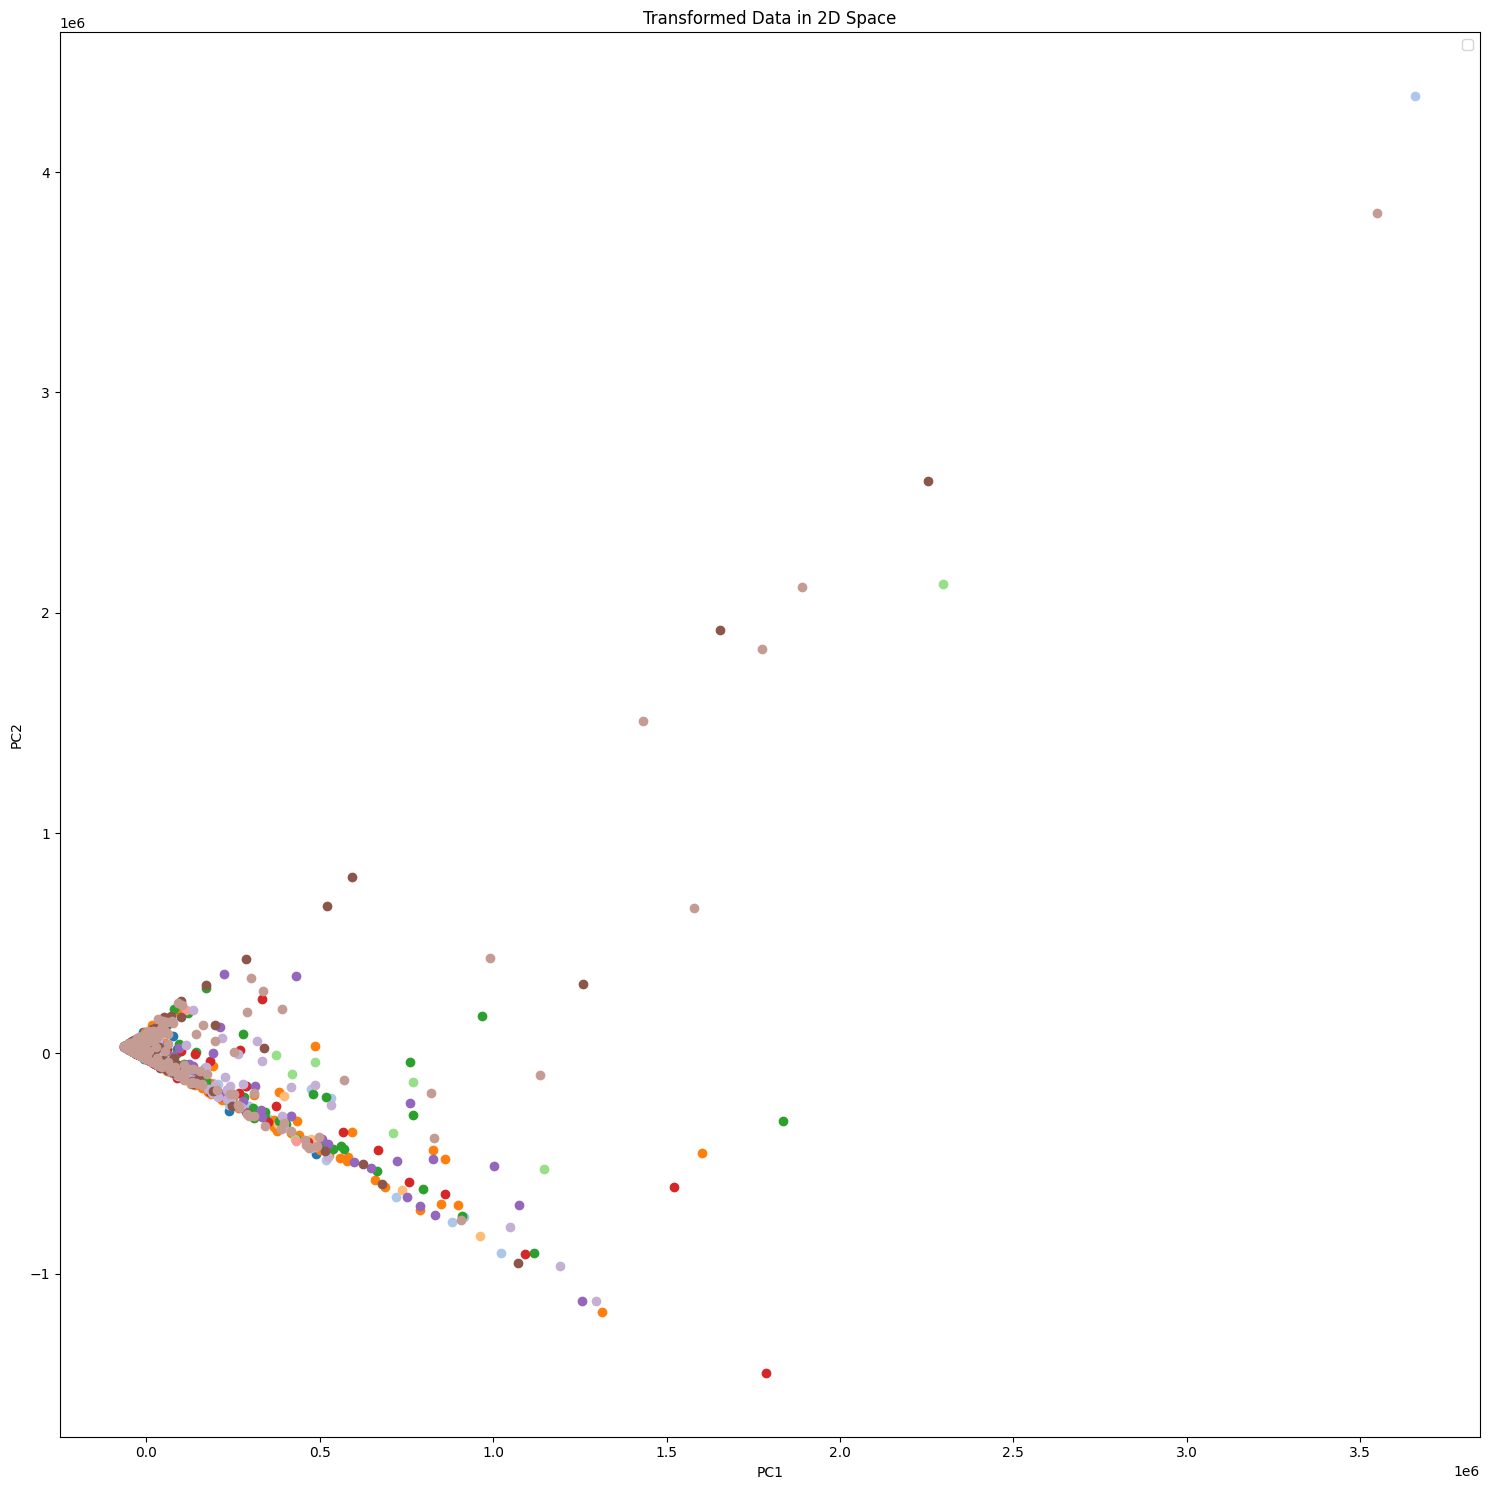

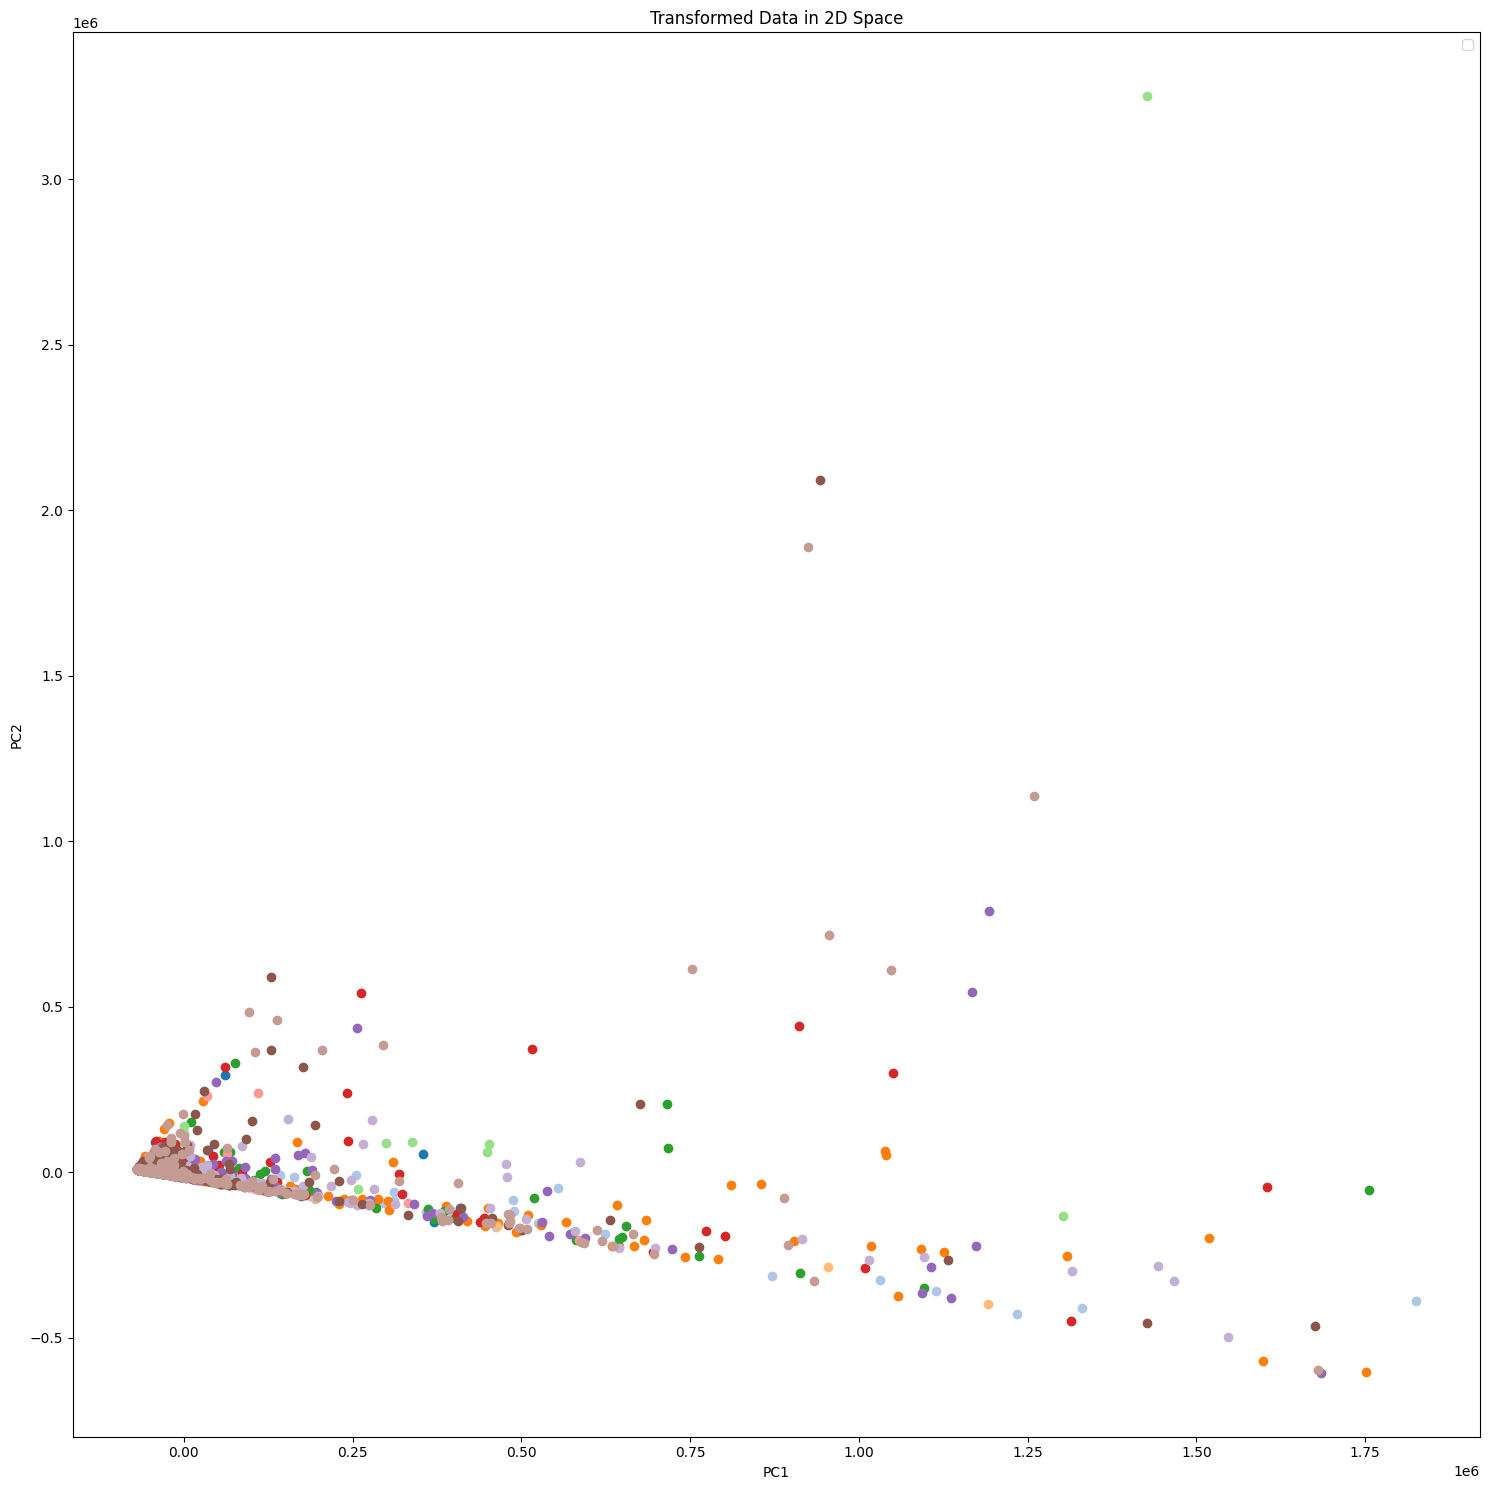

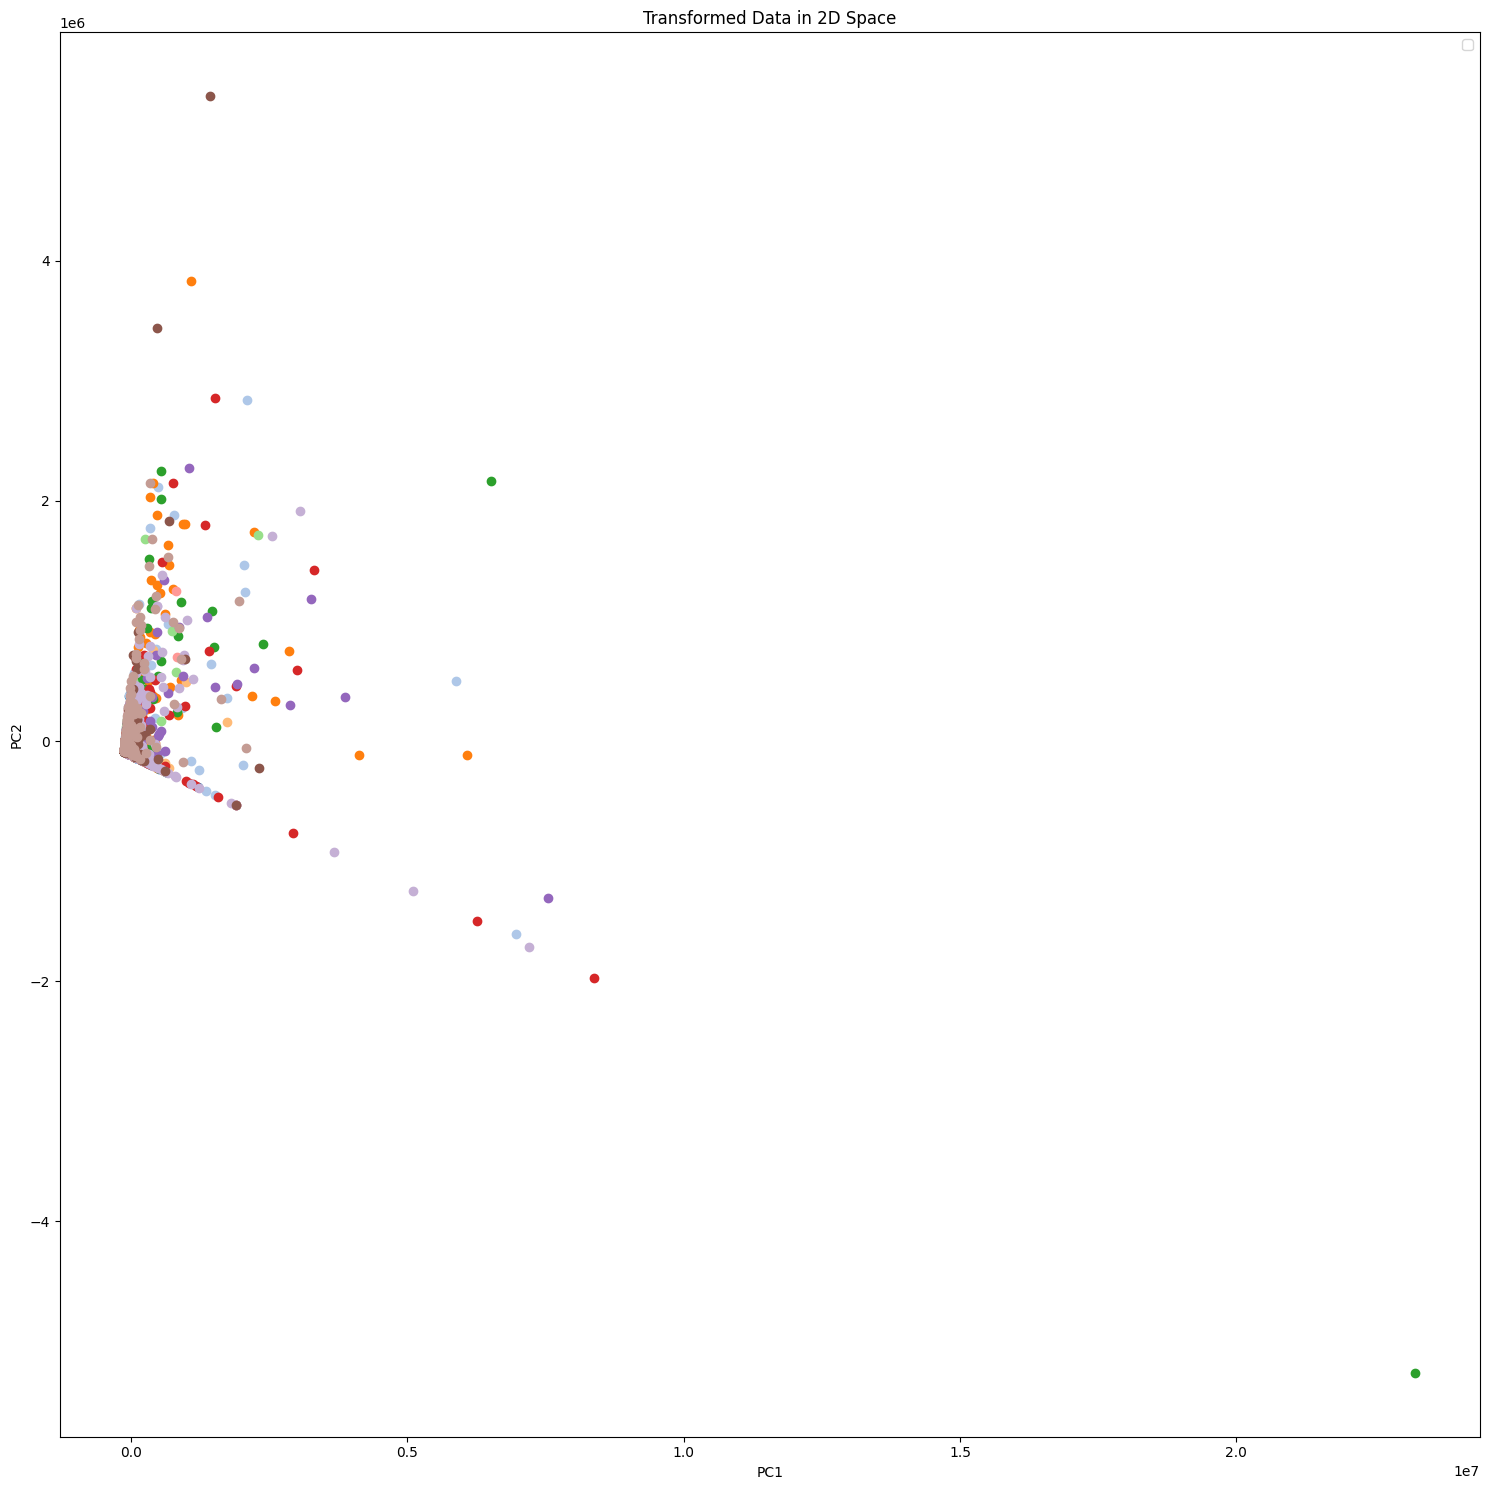

KeyboardInterrupt: ignored

In [ ]:
for chanel_number, channel_result in enumerate(pca_results):
    # Plot the transformed data for each channel in a 2D space with different colors per category
    fig, ax = plt.subplots(figsize=(15, 15))
    for i, pca_components_for_channel in enumerate(channel_result):
        if random.random() > 0.6:
            continue
        x = pca_components_for_channel[0]
        y = pca_components_for_channel[1]
        category_name_i = histograms_per_channels[chanel_number][i][0]
        # Get the color for the category based on the colormap
        color = category_colors[category_name_i]

        ax.scatter(x, y, color=color)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title('Transformed Data in 2D Space')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Descriptors

In [ ]:
dfDescriptors = pd.read_pickle(currentRoot + '/descriptors.pickle')

In [ ]:
dfDesc

(7358,)

In [ ]:
dfDescriptors.iloc[0,2].shape

(1000,)

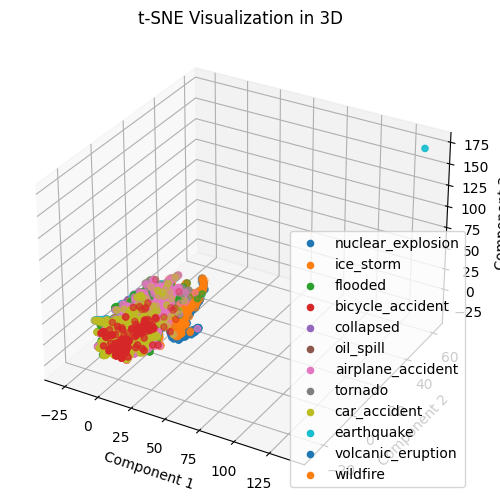

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming dfDescriptors is a DataFrame containing descriptors
# Convert the 'descriptors' column to a 2D NumPy array
descriptors_array = np.vstack(dfDescriptors['descriptors'].values)

# Initialize the t-SNE model with three components
tsne_model = TSNE(n_components=3, random_state=42)

# Apply t-SNE to the descriptors data
descriptors_tsne = tsne_model.fit_transform(descriptors_array)

# Create a new DataFrame to store the t-SNE components
df_tsne = pd.DataFrame(descriptors_tsne, columns=['Component 1', 'Component 2', 'Component 3'])

# Add the 'Categorie' column back to the DataFrame
df_tsne['Categorie'] = dfDescriptors['Categorie']

# Plot the t-SNE components in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Get unique categories
categories = df_tsne['Categorie'].unique()

# Plot each category in a different color
for category in categories:
    category_data = df_tsne[df_tsne['Categorie'] == category]
    ax.scatter(category_data['Component 1'], category_data['Component 2'], category_data['Component 3'], label=category)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('t-SNE Visualization in 3D')
ax.legend()

plt.show()


In [ ]:
descriptors_array[0].shape

(1000,)